## LABORATORIO 1
# Maria Alejandra Morales Miranda

Ejercicio 1 

In [1]:
from PIL import Image

def activar_canales_de_color(imagen, color):
    # Convertir la imagen a modo RGB para trabajar con los canales de color
    imagen_rgb = imagen.convert("RGB")
    width, height = imagen_rgb.size

    # Crear una nueva imagen en blanco con el mismo tamaño que la original
    imagen_activada = Image.new("RGB", (width, height), color=0)

    # Iterar sobre cada píxel de la imagen
    for x in range(width):
        for y in range(height):
            # Obtener el valor RGB del píxel actual
            r, g, b = imagen_rgb.getpixel((x, y))

            # Configurar los canales de color según el parámetro "color"
            if color == 1:  # Azul
                imagen_activada.putpixel((x, y), (0, 0, b))
            elif color == 2:  # Verde
                imagen_activada.putpixel((x, y), (0, g, 0))
            elif color == 3:  # Rojo
                imagen_activada.putpixel((x, y), (r, 0, 0))
            elif color == 10:  # Rojo y Verde
                imagen_activada.putpixel((x, y), (r, g, 0))
            elif color == 20:  # Verde y Azul
                imagen_activada.putpixel((x, y), (0, g, b))
            elif color == 30:  # Azul y Rojo
                imagen_activada.putpixel((x, y), (r, 0, b))
            else:
                # Si el valor de "color" no es válido, devolver la imagen original
                return imagen

    return imagen_activada


IMPLEMENTACION EJERCICIO 1

In [9]:
# Cargar la imagen
ruta_imagen = "tedlasso.jpeg"  # Reemplaza con la ruta de tu imagen
imagen = Image.open(ruta_imagen)

# Llamar a la función con el valor de "color" deseado (por ejemplo, 1 para azul)
color_deseado = 30
imagen_activada = activar_canales_de_color(imagen, color_deseado)

# Guardar la nueva imagen resultante
imagen_activada.save("imagen_ejercicio1.jpg")  # Reemplaza con la ruta donde quieras guardar la imagen


![Ejemplo de imagen](imagen_ejercicio1.jpg)

Ejercicio 2

In [10]:
def construir_imagen_color(imagen_rojo, imagen_verde, imagen_azul):
    # Asegurarnos de que las tres imágenes tengan las mismas dimensiones
    if imagen_rojo.size != imagen_verde.size or imagen_rojo.size != imagen_azul.size:
        raise ValueError("Las imágenes no tienen las mismas dimensiones.")

    # Crear una nueva imagen en blanco en modo RGB con las mismas dimensiones
    width, height = imagen_rojo.size
    imagen_color = Image.new("RGB", (width, height), color=0)

    # Iterar sobre cada píxel de las imágenes
    for x in range(width):
        for y in range(height):
            # Obtener el valor de intensidad de cada canal de color en el píxel actual
            r = imagen_rojo.getpixel((x, y))
            g = imagen_verde.getpixel((x, y))
            b = imagen_azul.getpixel((x, y))

            # Crear el píxel con los valores de intensidad como componentes de color
            color_rgb = (r, g, b)

            # Establecer el píxel en la nueva imagen a color
            imagen_color.putpixel((x, y), color_rgb)

    return imagen_color


IMPLEMENTACION EJERCICIO 2

In [27]:
# Cargar las tres imágenes en escala de grises
ruta_imagen_rojo = "imagen1_salida_gray_rojo.jpg"  # Reemplaza con la ruta de la imagen en escala de grises del canal rojo
ruta_imagen_verde = "imagen1_salida_gray_verde.jpg"  # Reemplaza con la ruta de la imagen en escala de grises del canal verde
ruta_imagen_azul = "imagen1_salida_gray_azul.jpg"  # Reemplaza con la ruta de la imagen en escala de grises del canal azul

imagen_rojo = Image.open(ruta_imagen_rojo)
imagen_verde = Image.open(ruta_imagen_verde)
imagen_azul = Image.open(ruta_imagen_azul)

# Llamar a la función para obtener la imagen a color resultante
imagen_a_color = construir_imagen_color(imagen_rojo, imagen_verde, imagen_azul)

# Guardar la imagen a color resultante
imagen_a_color.save("imagen_resultado1.jpg")  # Reemplaza con la ruta donde quieras guardar la imagen a color


![Ejemplo de imagen](imagen1/imagen_resultado1.jpg)


Ejercicio 3

In [28]:

def crear_escala_grises_en_tres_dimensiones(imagen):
    # Convertir la imagen a modo RGB para trabajar con los canales de color
    imagen_rgb = imagen.convert("RGB")
    width, height = imagen_rgb.size

    # Crear tres imágenes en escala de grises para cada canal de color (rojo, verde y azul)
    imagen_rojo = Image.new("L", (width, height), color=0)
    imagen_verde = Image.new("L", (width, height), color=0)
    imagen_azul = Image.new("L", (width, height), color=0)

    # Iterar sobre cada píxel de la imagen original
    for x in range(width):
        for y in range(height):
            # Obtener el valor de intensidad del píxel actual
            r, g, b = imagen_rgb.getpixel((x, y))

            # Calcular el valor promedio de intensidad para los tres canales
            intensidad_promedio = int((r + g + b) / 3)

            # Establecer el valor de intensidad en cada canal de color para el píxel correspondiente
            imagen_rojo.putpixel((x, y), intensidad_promedio)
            imagen_verde.putpixel((x, y), intensidad_promedio)
            imagen_azul.putpixel((x, y), intensidad_promedio)

    return imagen_rojo, imagen_verde, imagen_azul


Imagen Original 

![Imagen Original](tedlasso.jpeg)


In [29]:
# Cargar la imagen original
ruta_imagen_original = "tedlasso.jpeg"  # Reemplaza con la ruta de tu imagen original
imagen_original = Image.open(ruta_imagen_original)

# Crear la escala de grises en tres dimensiones
imagen_rojo, imagen_verde, imagen_azul = crear_escala_grises_en_tres_dimensiones(imagen_original)

# Guardar las tres imágenes en escala de grises resultantes
imagen_rojo.save("tedlasso_ROJO.jpeg")  # Reemplaza con la ruta donde quieras guardar la imagen rojo
imagen_verde.save("tedlasso_VERDE.jpeg")  # Reemplaza con la ruta donde quieras guardar la imagen verde
imagen_azul.save("tedlasso_AZUL.jpeg")  # Reemplaza con la ruta donde quieras guardar la imagen azul


Resultado

![Resultado](tedlasso_VERDE.jpeg)

Ejercicio 4

In [30]:
import matplotlib.pyplot as plt

def mostrar_histogramas(imagen):
    # Convertir la imagen a escala de grises utilizando el promedio aritmético
    imagen_gris = imagen.convert("L")

    # Obtener los datos de píxeles de cada canal de color
    datos_rojo, datos_verde, datos_azul = imagen.split()

    # Calcular el promedio de cada canal de color
    promedio_rojo = sum(datos_rojo.histogram()) // len(datos_rojo.histogram())
    promedio_verde = sum(datos_verde.histogram()) // len(datos_verde.histogram())
    promedio_azul = sum(datos_azul.histogram()) // len(datos_azul.histogram())
    promedio_gris = sum(imagen_gris.histogram()) // len(imagen_gris.histogram())

    # Crear figuras para mostrar los histogramas
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Histograma del canal rojo
    axs[0, 0].hist(datos_rojo.histogram(), bins=256, color='red', alpha=0.7)
    axs[0, 0].axvline(promedio_rojo, color='black', linestyle='dashed', linewidth=1)
    axs[0, 0].set_title('Histograma Rojo')

    # Histograma del canal verde
    axs[0, 1].hist(datos_verde.histogram(), bins=256, color='green', alpha=0.7)
    axs[0, 1].axvline(promedio_verde, color='black', linestyle='dashed', linewidth=1)
    axs[0, 1].set_title('Histograma Verde')

    # Histograma del canal azul
    axs[1, 0].hist(datos_azul.histogram(), bins=256, color='blue', alpha=0.7)
    axs[1, 0].axvline(promedio_azul, color='black', linestyle='dashed', linewidth=1)
    axs[1, 0].set_title('Histograma Azul')

    # Histograma de escala de grises
    axs[1, 1].hist(imagen_gris.histogram(), bins=256, color='gray', alpha=0.7)
    axs[1, 1].axvline(promedio_gris, color='black', linestyle='dashed', linewidth=1)
    axs[1, 1].set_title('Histograma Escala de Grises')

    # Ajustar la disposición de los gráficos
    plt.tight_layout()

    # Mostrar los histogramas
    plt.show()


IMPLEMENTACION EJERCICIO 4

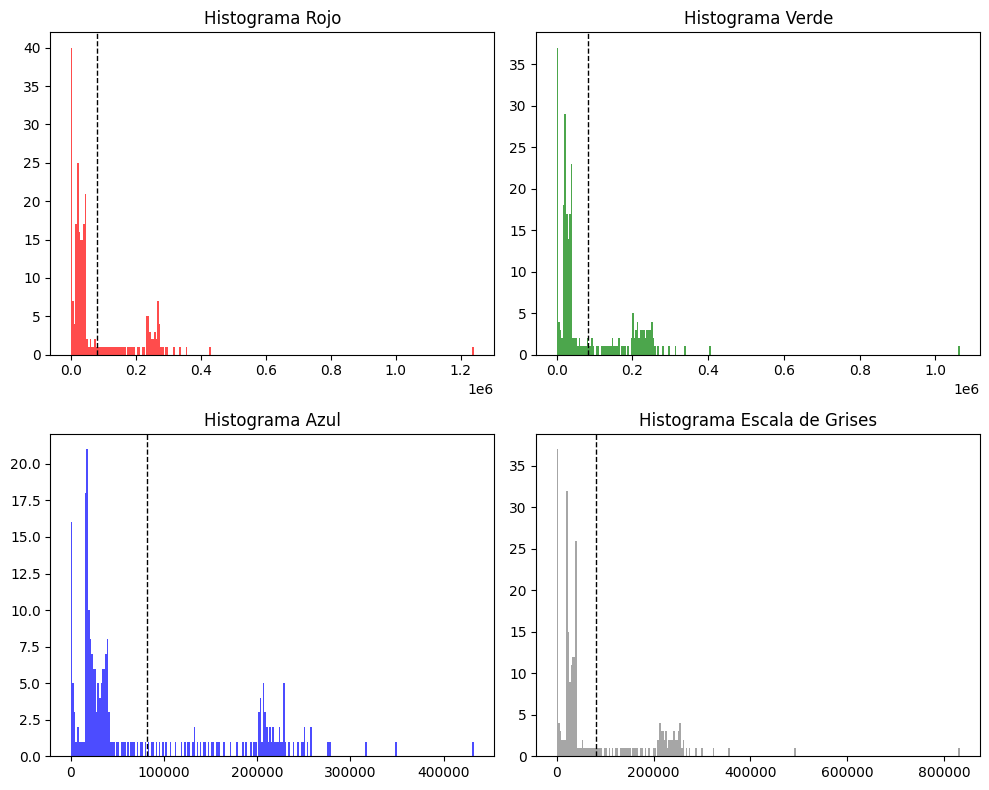

In [31]:
# Cargar la imagen
ruta_imagen = "tedlasso.jpeg"  # Reemplaza con la ruta de tu imagen
imagen = Image.open(ruta_imagen)

# Mostrar los histogramas de la imagen
mostrar_histogramas(imagen)


Ejercicio 5

In [32]:
def convertir_a_hsv(imagen):
    # Convertir la imagen a modo HSV
    imagen_hsv = imagen.convert("HSV")
    return imagen_hsv

def mostrar_histograma_histograma_pdf(imagen, nombre_archivo_pdf):
    # Convertir la imagen a HSV
    imagen_hsv = convertir_a_hsv(imagen)

    # Obtener los datos de píxeles de cada canal de color
    datos_hue, datos_saturation, datos_value = imagen_hsv.split()

    # Calcular el promedio de cada canal de color
    promedio_hue = sum(datos_hue.histogram()) // len(datos_hue.histogram())
    promedio_saturation = sum(datos_saturation.histogram()) // len(datos_saturation.histogram())
    promedio_value = sum(datos_value.histogram()) // len(datos_value.histogram())

    # Crear figura para mostrar los histogramas
    fig, axs = plt.subplots(3, 1, figsize=(8, 10))

    # Histograma del canal Hue (Matiz)
    axs[0].hist(datos_hue.histogram(), bins=256, color='orange', alpha=0.7)
    axs[0].axvline(promedio_hue, color='black', linestyle='dashed', linewidth=1)
    axs[0].set_title('Histograma Hue (Matiz)')

    # Histograma del canal Saturation (Saturación)
    axs[1].hist(datos_saturation.histogram(), bins=256, color='green', alpha=0.7)
    axs[1].axvline(promedio_saturation, color='black', linestyle='dashed', linewidth=1)
    axs[1].set_title('Histograma Saturation (Saturación)')

    # Histograma del canal Value (Valor)
    axs[2].hist(datos_value.histogram(), bins=256, color='blue', alpha=0.7)
    axs[2].axvline(promedio_value, color='black', linestyle='dashed', linewidth=1)
    axs[2].set_title('Histograma Value (Valor)')

    # Ajustar la disposición de los gráficos
    plt.tight_layout()

    # Guardar los histogramas en un PDF
    plt.savefig(nombre_archivo_pdf)
    plt.close()


IMPLEMENTACION EJERCICIO 5

In [33]:

    # Cargar la imagen
ruta_imagen = "tedlasso.jpeg"  # Reemplaza con la ruta de tu imagen
imagen = Image.open(ruta_imagen)

    # Generar el PDF con los histogramas
nombre_archivo_pdf = "histogramas.pdf"
mostrar_histograma_histograma_pdf(imagen, nombre_archivo_pdf)

print(f"Se ha generado el archivo PDF con los histogramas: {nombre_archivo_pdf}")
